In [1]:
#Load appropriate packages

#Numerical analysis
import numpy as np

#Data analysis
import pandas as pd

#Create figures
import matplotlib.pyplot as plt

#Enables drawing of figures
%matplotlib inline

#For better data visualization
import seaborn as sns

In [2]:
#Reading in Ames_HousePrice data
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
#Reading in Ames_Real_Estate data
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv", index_col=0)
real_estate.shape

/Users/mattwoolf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(22213, 90)

In [4]:
#Jason's csv location file from Github
locations = pd.read_csv("locations.csv", index_col=0)
locations.shape

(2559, 4)

In [5]:
real_estate.columns.sort_values()

Index(['AcreGr', 'AcreNt_S', 'AcreX_S1', 'BldgNo_S', 'BldgType', 'Cars',
       'Central Air', 'ClassPr_S', 'ClassSc_S', 'Date', 'DwlgNo_S', 'Ext1',
       'Ext2', 'Fireplaces', 'Foundation', 'GLA', 'GarYrBlt', 'GarageArea',
       'GarageType', 'GeoRefNo', 'HSTtl_D', 'HSTtl_S', 'Heating', 'HouseStyle',
       'ImpAcX1S', 'ImpAcX2S', 'ImpAc_S', 'Inst1TPr', 'Inst1_Mo', 'Inst1_No',
       'Inst1_Yr', 'Legal_Pr', 'LndAcX1S', 'LndAc_S', 'LotArea', 'MA_City',
       'MA_Line1', 'MA_Line2', 'MA_Ownr1', 'MA_Ownr2', 'MA_State', 'MA_Zip1',
       'MA_Zip2', 'MasVnrType', 'MilVal_D', 'MilVal_S', 'MoSold_MM',
       'Neighborhood', 'NmbrBRs', 'OthAc_S', 'PA-Nmbr', 'PA-PostD', 'PA-PreD',
       'PA-StSfx', 'PA-Strt', 'PA-UnTyp', 'PA-UntNo', 'ParType', 'ParclRel',
       'PoolArea', 'Prop_Addr', 'Range', 'Rcrd_Mo', 'Rcrd_Yr', 'RoofMatl',
       'SaleCond', 'SalePrice', 'SaleType', 'SchD_S', 'Source', 'Tier',
       'TotRmsAbvGrd', 'TtlBsmtSF', 'TtlVal_AsrYr', 'TxD_S', 'ValType',
       'X1TPr_D', '

In [6]:
# Merge the two DataFrames based on the shared unique identifier to add property address
housing = pd.merge(housing, real_estate[['GeoRefNo', 'Prop_Addr']], left_on='PID', right_on='GeoRefNo')

In [7]:
housing.shape

(2604, 83)

In [8]:
#Looking at data from top down
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150,436 HAYWARD AVE
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230,3416 WEST ST
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230,3416 WEST ST
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020,320 S 2ND ST
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150,1524 DOUGLAS AVE


In [9]:
#See all column names
list(housing.columns)

['PID',
 'GrLivArea',
 'SalePrice',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',

In [10]:
#Get basic summary stats of variables 
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GeoRefNo
count,2.604000e+03,2604.000000,2604.000000,2604.000000,2141.000000,2604.000000,2604.000000,2604.00000,2604.000000,2604.000000,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2.604000e+03
mean,7.140050e+08,1483.296851,178044.983487,57.932028,68.326483,10075.113671,6.044931,5.61828,1970.488479,1983.778418,...,96.222734,45.689708,22.858679,2.488095,16.469278,1.646697,48.435868,6.143241,2007.837942,7.140050e+08
std,1.886463e+08,488.681334,75613.734968,43.166044,22.851029,8090.893688,1.364967,1.11680,29.580578,20.452593,...,129.061706,64.688762,63.739487,25.178202,56.993811,30.199624,496.489365,2.666332,1.315356,1.886463e+08
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.00000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,5.263011e+08
25%,5.284901e+08,1106.500000,129975.000000,20.000000,57.000000,7374.250000,5.000000,5.00000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,5.284901e+08
50%,5.354540e+08,1432.000000,159500.000000,50.000000,68.000000,9360.000000,6.000000,5.00000,1972.000000,1992.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,5.354540e+08
75%,9.071800e+08,1730.500000,208925.000000,70.000000,80.000000,11461.500000,7.000000,6.00000,1999.000000,2003.000000,...,168.250000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.071800e+08
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.00000,2010.000000,2010.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,1.007100e+09


In [11]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

Text(0, 0.5, 'Frequency')

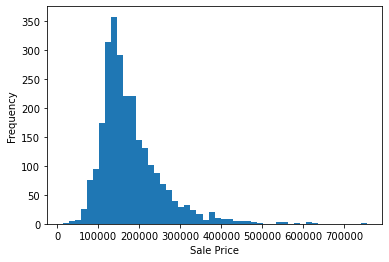

In [12]:
#Examining distribution of Sales Prices
housing['SalePrice'].plot(kind='hist', bins = 50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

In [13]:
#Get columns related to square feet (SF) and area
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
0,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
1,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0


<AxesSubplot:>

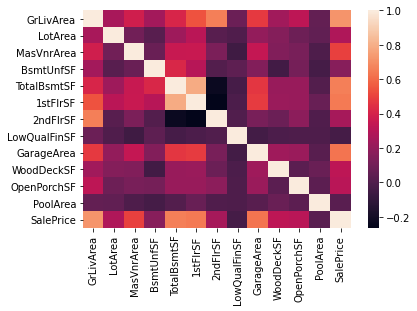

In [14]:
#Create correlation plot with size_related
corr_size_related = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr_size_related)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

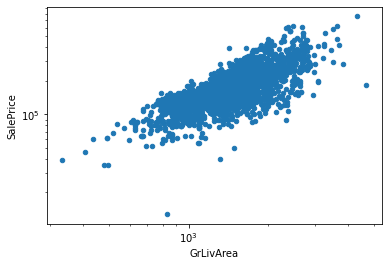

In [33]:
#Scatterplot of Sales Price and Greater Living Area since correlation is high. 
#Values are logged for homoscedasticity. 
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', 
                                       logx = True, logy = True)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

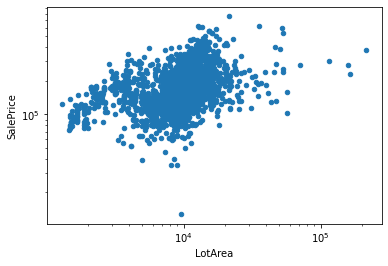

In [18]:
#Scatterplot of Sales Price and Lot Area since correlation is high. 
#Values are logged for homoscedasticity. 
housing[['LotArea', 'SalePrice']].plot(kind='scatter', x='LotArea', y='SalePrice', 
                                       logx = True, logy = True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

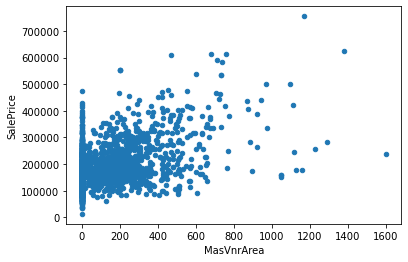

In [38]:
#Scatterplot of Sales Price and Masonry Veneer Area since correlation is high. 
#Values are NOT logged since there appears to be homoscedasticity. 
housing[['MasVnrArea', 'SalePrice']].plot(kind='scatter', x='MasVnrArea', y='SalePrice', 
                                       logx = False, logy = False)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

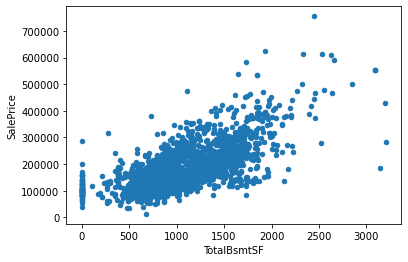

In [42]:
#Scatterplot of Sales Price and Basement Square Feet since correlation is high. 
#Values are NOT logged since there appears to be homoscedasticity (maybe?). 
housing[['TotalBsmtSF', 'SalePrice']].plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', 
                                       logx = False, logy = False)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

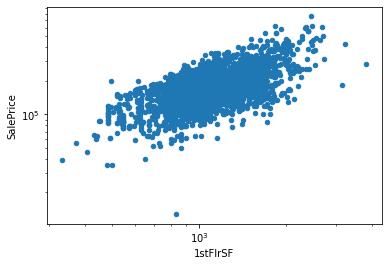

In [45]:
#Scatterplot of Sales Price and First Floor Square Feet since correlation is high. 
#Values are logged since there appears to be homoscedasticity. 
housing[['1stFlrSF', 'SalePrice']].plot(kind='scatter', x='1stFlrSF', y='SalePrice', 
                                       logx = True, logy = True)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

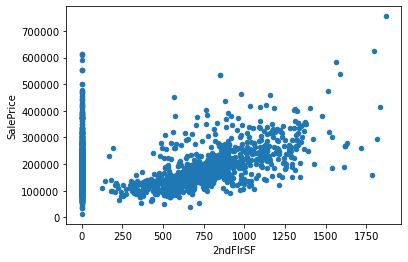

In [47]:
#Scatterplot of Sales Price and Second Floor Square Feet since correlation is high. 
#Values are NOT logged since there appears to be homoscedasticity. 
housing[['2ndFlrSF', 'SalePrice']].plot(kind='scatter', x='2ndFlrSF', y='SalePrice', 
                                       logx = False, logy = False)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

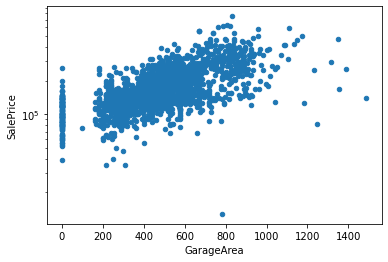

In [52]:
#Scatterplot of Sales Price and Garage Area since correlation is high. 
#Only y value logged!
housing[['GarageArea', 'SalePrice']].plot(kind='scatter', x='GarageArea', y='SalePrice', 
                                       logx = False, logy = True)

In [27]:
#Get columns related to porch
porch_related = housing.filter(regex='Porch')
porch_related.head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,0,0,166
1,105,0,0,0
2,105,0,0,0
3,0,42,86,0
4,0,168,0,111


<AxesSubplot:>

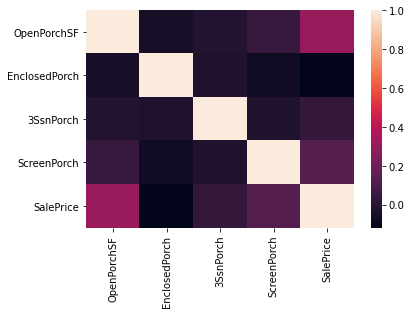

In [54]:
#Correlation for porch_related 
corr_porch_related = pd.concat([porch_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr_porch_related)

#None of these correlations seem particularly high!

In [53]:
#Get columns related to pool
pool_related = housing.filter(regex='Pool')
pool_related.head()

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


<AxesSubplot:>

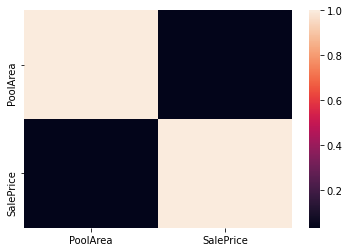

In [57]:
corr_pool_related = pd.concat([pool_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr_pool_related)

#Neither correlation is high so we ignore. 

In [58]:
#Get columns related to basement
basement_related = housing.filter(regex='Bsmt')
basement_related.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,1.0,0.0
1,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,1.0,0.0
2,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,1.0,0.0
3,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,0.0,0.0
4,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,0.0,0.0


<AxesSubplot:>

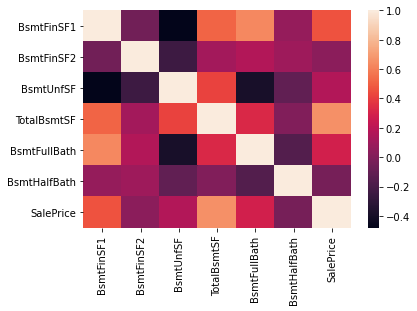

In [59]:
#Correlation for basement_related
corr_basement_related = pd.concat([basement_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr_basement_related)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

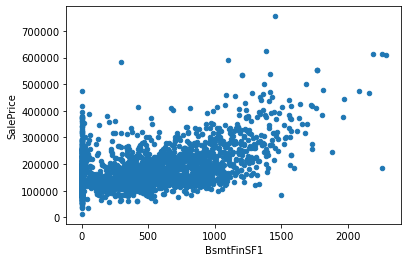

In [64]:
#Scatterplot of Sales Price and Type 1 Finished Square Feet since correlation is high. 
#Values not logged, but might consider logging...
housing[['BsmtFinSF1', 'SalePrice']].plot(kind='scatter', x='BsmtFinSF1', y='SalePrice',
                                          logx = False, logy = False)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

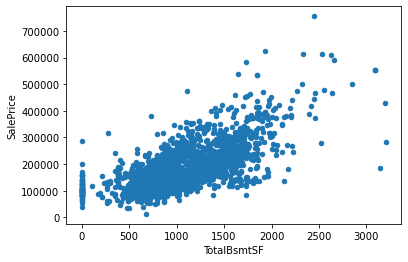

In [65]:
#Scatterplot of Sales Price and Total Basement Square Feet since correlation is high. 
#Values not logged, but might consider logging...
housing[['TotalBsmtSF', 'SalePrice']].plot(kind='scatter', x='TotalBsmtSF', y='SalePrice',
                                          logx = False, logy = False)